<img align="left" width="100" height="250" src="https://cdn-icons-png.flaticon.com/512/2504/2504929.png">

> # Netflix Movies and TV Shows
> #### Author: Colin Tomb

<hr style="height:0.1px;border-width:0;color:black;background-color:#E50914">

## Introduction
**Netflix**

<hr style="height:0.1px;border-width:0;color:black;background-color:#E50914">

In [1]:
%%html
<style>
blockquote {
    border-left: 5px solid #E50914; #changes the default blockquotes colour to Netflix' distinctive red 
</style>

## Table of Contents
> - Import Necessary Libraries [click here](#Import-Necessary-Libraries)
> - Understanding the Data [click here](#Understanding-the-Data)
> - Data Preparation [click here](#Data-Preparation)
> - Exploratory Data Analysis [click here](#Exploratory-Data-Analysis)
> - Conclusions [click here](#Conclusions)

## Import Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns

20

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/ColinT2023/BPP_Data_Analytics/main/netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### What are the top 10 countries that produce content for Netflix?

In [7]:
# count the number of shows per country and sort in descending order

countries = df['country'].value_counts().sort_values(ascending=False)

# print the top 10 countries
print(countries.head(10))

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64


### What are the top 10 most common genres?

In [9]:
# split the 'listed_in' column by comma and count the occurrences of each genre
genres = df['listed_in'].str.split(',').explode().str.strip().value_counts()

# print the top 10 genres
print(genres.head(10))

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: listed_in, dtype: int64


### What is the average duration of movies vs. TV shows on Netflix?

In [45]:
# separate movies and TV shows into separate DataFrames
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# calculate the mean duration for each
movie_duration = movies['duration'].str.replace(' min', '').fillna(0).astype(int).mean()
tv_duration = tv_shows['duration'].str.replace(' Seasons', '').fillna(0).astype(int).mean()

# print the results
print(f"Average movie duration: {movie_duration:.2f} minutes")
print(f"Average TV show duration: {tv_duration:.2f} seasons")

ValueError: invalid literal for int() with base 10: '1 Season'

In [46]:
# separate TV shows into a separate DataFrame
tv_shows = df[df['type'] == 'TV Show']

# remove non-numeric characters from the 'duration' column
tv_shows['duration'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

# calculate the mean duration for TV shows
tv_duration = tv_shows['duration'].mean()

# print the result
print(f"Average TV show duration: {tv_duration:.2f} seasons")


Average TV show duration: 1.76 seasons


C:\Users\Colin\AppData\Local\Temp\ipykernel_37040\3118076724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['duration'] = tv_shows['duration'].str.extract('(\d+)').astype(float)


### What are the top 10 directors with the most content on Netflix?

In [15]:
# count the number of shows per director and sort in descending order
directors = df['director'].value_counts().sort_values(ascending=False)

# print the top 10 directors
print(directors.head(10))

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Steven Spielberg          11
Name: director, dtype: int64


### What is the distribution of content types (movies vs. TV shows) on Netflix?

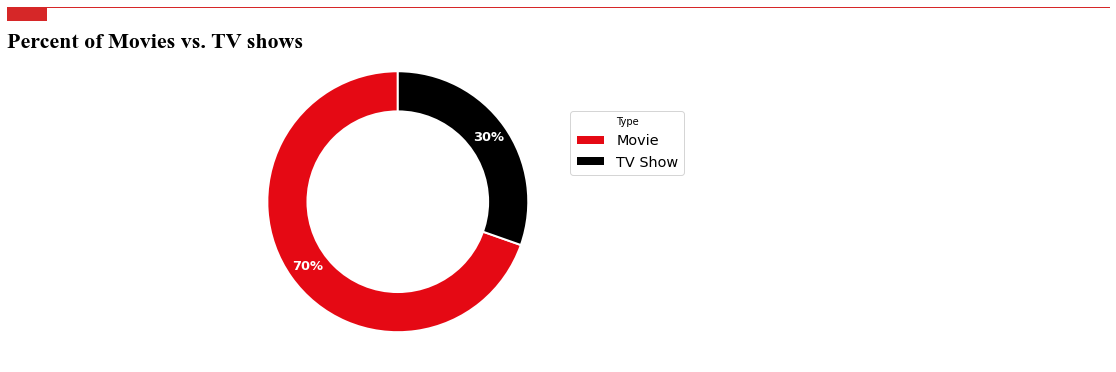

In [96]:
counts = df['type'].value_counts()

fig, ax = plt.subplots(figsize = (10,6))

ax.pie(counts, 
       startangle=90,
       labels = counts.index,
       autopct='%.0f%%',
       pctdistance=.85,
       colors=['#E50914', 'black'],
       labeldistance=1.1,
       wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

       

hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(hole)

# Setting label color to white
for text in ax.texts:
    text.set_color('white')
    text.set_size(13)
    text.set_weight('bold')
    
# Adding legend
ax.legend(title='Type', loc='upper right', fontsize = 'x-large', bbox_to_anchor=(1, 0, 0.4, 0.8))

ax.set_title("Percent of Movies vs. TV shows", x = -0.03,y = 0.86,fontweight="bold",fontname = 'Times New Roman',\
             fontsize = 22, ha = 'left',transform = fig.transFigure);

# The below code replicates the graphical flourish, The Economist includes at the top of all their charts

# add line
ax.plot(
    [-0.030, 1.5],                # X-coordinates of the ends of the line
    [.9535, .9535],             # Y-coordinates of the ends of the line
    transform = fig.transFigure,  # Coordinate system for the line
    clip_on = False,              # Whether to clip the line to the axes bounds
    color = 'tab:red',           # Color of the line
    linewidth = 1           # Width of the line
)


# add rectangle
ax.add_patch(
    plt.Rectangle(
        (-0.03,.95),                   # (x, y) location of the bottom-left corner of the rectangle
        0.055,                         # width of the rectangle
        -0.03,                         # height of the rectangle
        facecolor = 'tab:red',        # fill color of the rectangle
        transform = fig.transFigure,   # coordinate system used for the rectangle
        clip_on = False,               # whether the rectangle is drawn outside the plot area
        linewidth = 0                  # width of the edge line of the rectangle
    )
);

### What is the most common rating on Netflix?

In [19]:
# count the number of shows per rating and sort in descending order
ratings = df['rating'].value_counts().sort_values(ascending=False)

# print the most common rating
print(f"The most common rating on Netflix is {ratings.index[0]} with {ratings.iloc[0]} shows.")

The most common rating on Netflix is TV-MA with 3207 shows.


### What is the average length of descriptions on Netflix?

In [20]:
# calculate the length of each description
description_length = df['description'].str.len()

# calculate the mean description length
mean_description_length = description_length.mean()

# print the result
print(f"The average length of descriptions on Netflix is {mean_description_length:.0f} characters.")

The average length of descriptions on Netflix is 143 characters.


### What is the distribution of release years for content on Netflix?

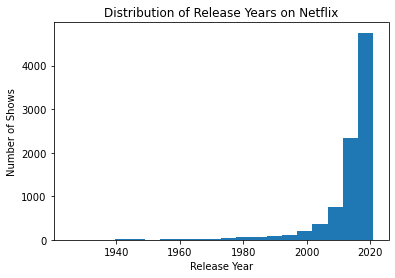

In [22]:
# count the number of shows per release year
counts = df['release_year'].value_counts()

# create a histogram
plt.hist(df['release_year'], bins=20)
plt.xlabel("Release Year")
plt.ylabel("Number of Shows")
plt.title("Distribution of Release Years on Netflix")
plt.show()

### What are the top 10 most common cast members on Netflix?

In [23]:
# count the number of shows per cast member and sort in descending order
cast = df['cast'].str.split(',').explode().str.strip().value_counts()

# print the top 10 cast members
print(cast.head(10))

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: cast, dtype: int64


### What is the distribution of content types and ratings on Netflix?

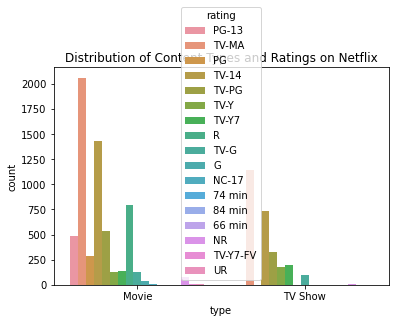

In [26]:
# create a countplot with content type and rating as the x and hue variables, respectively
sns.countplot(x='type', hue='rating', data=df)
plt.title("Distribution of Content Types and Ratings on Netflix")
plt.show()

### How many shows on Netflix were added in each year?

In [27]:
# count the number of shows added per year
year_counts = df['date_added'].str[-4:].value_counts()

# print the result
print(year_counts)

2019    2016
2020    1879
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: date_added, dtype: int64


### What is the average duration of TV shows and movies on Netflix?

In [28]:
# separate movies and TV shows into separate DataFrames
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# calculate the mean duration for each DataFrame
mean_movie_duration = movies['duration'].str.split().str[0].astype(int).mean()
mean_tv_duration = tv_shows['duration'].str.split().str[0].astype(int).mean()

# print the results
print(f"The average movie on Netflix is {mean_movie_duration:.0f} minutes long.")
print(f"The average TV show episode on Netflix is {mean_tv_duration:.1f} seasons long.")

ValueError: cannot convert float NaN to integer

### What is the most common country of production for Netflix content?

In [29]:
# count the number of shows per country and sort in descending order
country_counts = df['country'].str.split(',').explode().str.strip().value_counts()

# print the most common country
print(f"The most common country of production for Netflix content is {country_counts.index[0]}.")

The most common country of production for Netflix content is United States.


### What is the average length of movies on Netflix by rating?

In [30]:
# separate movies by rating into separate DataFrames
ratings = df['rating'].unique()
movie_dfs = [df[(df['type'] == 'Movie') & (df['rating'] == rating)] for rating in ratings]

# calculate the mean duration for each DataFrame
mean_durations = [df['duration'].str.split().str[0].astype(int).mean() for df in movie_dfs]

# create a DataFrame with the results
result = pd.DataFrame({'rating': ratings, 'average_duration': mean_durations})

# print the result
print(result)

ValueError: cannot convert float NaN to integer

### How many movies and TV shows on Netflix have been released in each year?

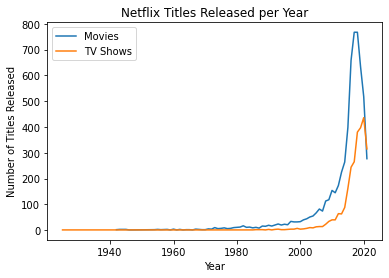

In [38]:
# create separate DataFrames for movies and TV shows
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# count the number of movies and TV shows released per year
movie_counts = movies['release_year'].value_counts().sort_index()
tv_counts = tv_shows['release_year'].value_counts().sort_index()

# create a line chart to visualize the results
plt.plot(movie_counts.index, movie_counts.values, label="Movies")
plt.plot(tv_counts.index, tv_counts.values, label="TV Shows")
plt.xlabel("Year")
plt.ylabel("Number of Titles Released")
plt.title("Netflix Titles Released per Year")
plt.legend()
plt.show()

### How many TV shows on Netflix have more than 5 seasons?

In [33]:
# filter for TV shows with more than 5 seasons
long_tv_shows = df[(df['type'] == 'TV Show') & (df['duration'].str.contains('Season'))]
long_tv_shows = long_tv_shows[long_tv_shows['duration'].str.split().str[0].astype(int) > 5]

# count the number of TV shows
num_long_tv_shows = len(long_tv_shows)

# print the result
print(f"There are {num_long_tv_shows} TV shows on Netflix with more than 5 seasons.")

There are 99 TV shows on Netflix with more than 5 seasons.


### What is the distribution of movie ratings on Netflix?

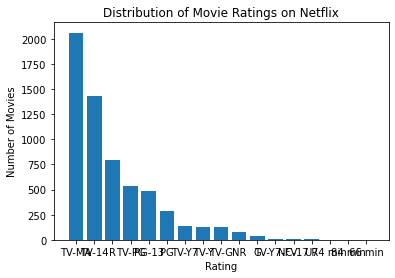

In [34]:
# filter for movies and count the number of movies per rating
movies = df[df['type'] == 'Movie']
rating_counts = movies['rating'].value_counts()

# create a bar chart to visualize the results
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movie Ratings on Netflix")
plt.show()

In [35]:
# count the number of shows per director and sort in descending order
director_counts = df['director'].str.split(',').explode().str.strip().value_counts()

# print the most common director
print(f"The most common director on Netflix is {director_counts.index[0]}.")

The most common director on Netflix is Rajiv Chilaka.


### What is the median release year of TV shows on Netflix?

In [36]:
# filter for TV shows and compute the median release year
tv_shows = df[df['type'] == 'TV Show']
median_release_year = tv_shows['release_year'].median()

# print the result
print(f"The median release year of TV shows on Netflix is {median_release_year:.0f}.")

The median release year of TV shows on Netflix is 2018.


### What is the standard deviation of movie ratings on Netflix?

In [37]:
# filter for movies and compute the standard deviation of ratings
movies = df[df['type'] == 'Movie']
std_rating = np.std(movies['rating'], ddof=1)

# print the result
print(f"The standard deviation of movie ratings on Netflix is {std_rating:.2f}.")

TypeError: could not convert string to float: 'PG-13'

### What is the correlation between the release year and the duration of movies on Netflix?

In [38]:
# filter for movies and compute the correlation between release year and duration
movies = df[df['type'] == 'Movie']
corr = np.corrcoef(movies['release_year'], movies['duration'].str.split().str[0].astype(int))[0, 1]

# print the result
print(f"The correlation between the release year and duration of movies on Netflix is {corr:.2f}.")

ValueError: cannot convert float NaN to integer

In [40]:
# filter for movies and create a new DataFrame with release year and duration columns
movies = df[df['type'] == 'Movie']
movie_data = pd.DataFrame({'release_year': movies['release_year'], 'duration': movies['duration'].str.split().str[0].astype(int)})

# fit a linear regression model to the data
model = sm.OLS.from_formula('duration ~ release_year', data=movie_data)
results = model.fit()

# print the model summary
print(results.summary())

ValueError: cannot convert float NaN to integer